NOTE: When referencing episodes of the show, shorthand may be used (e.g., S3E7 is Season 3 Episode 7). Some people may consider character word counts to be a spoiler, proceed at your own risk. 

# Word Count Histograms

Now that we have our word count tables, we can aggregate the data, look for anything that might need to be cleaned up, and start comparing show-wide word counts for different characters. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
from io import BytesIO

In [2]:
s1_cumul = pd.DataFrame()
season = 1
for ep_num in range(1,25):
    episode_table = pd.read_csv("../Word Count Tables/Season "+str(season)+'/S'+str(season)+'E'+str(ep_num)+'.csv')
    s1_cumul = pd.concat([s1_cumul, episode_table], axis=0)
s1_cumul = s1_cumul.groupby(['Character']).sum().reset_index()

In [3]:
s1_cumul.sort_values(['Word Count'], ascending=False)[:10]

,Character,Word Count
56,JACK,11632
73,LOCKE,7475
20,CHARLIE,7230
119,SAWYER,6984
121,SAYID,6971
63,KATE,6495
87,MICHAEL,6357
52,HURLEY,5548
14,BOONE,3981
23,CLAIRE,3114


In [4]:
s2_cumul = pd.DataFrame()
season = 2
for ep_num in range(1,24):
    episode_table = pd.read_csv("../Word Count Tables/Season "+str(season)+'/S'+str(season)+'E'+str(ep_num)+'.csv')
    s2_cumul = pd.concat([s2_cumul, episode_table], axis=0)
s2_cumul = s2_cumul.groupby(['Character']).sum().reset_index()

In [5]:
s2_cumul.sort_values(['Word Count'], ascending=False)[:10]

,Character,Word Count
60,JACK,7457
75,LOCKE,6759
124,SAWYER,5694
56,HURLEY,4315
18,CHARLIE,3936
37,EKO,3677
88,MICHAEL,3562
67,KATE,3311
125,SAYID,3286
30,DESMOND,2478


In [6]:
s3_cumul = pd.DataFrame()
season = 3
for ep_num in range(1,23):
    episode_table = pd.read_csv("../Word Count Tables/Season "+str(season)+'/S'+str(season)+'E'+str(ep_num)+'.csv')
    s3_cumul = pd.concat([s3_cumul, episode_table], axis=0)
s3_cumul = s3_cumul.groupby(['Character']).sum().reset_index()

In [7]:
s3_cumul.sort_values(['Word Count'], ascending=False)[:10]

,Character,Word Count
76,JACK,6271
19,BEN,6019
152,SAWYER,5818
83,JULIET,5262
29,CHARLIE,4806
92,LOCKE,4648
85,KATE,4512
73,HURLEY,4195
42,DESMOND,4134
153,SAYID,2868


In [8]:
s4_cumul = pd.DataFrame()
season = 4
for ep_num in range(1,14):
    episode_table = pd.read_csv("../Word Count Tables/Season "+str(season)+'/S'+str(season)+'E'+str(ep_num)+'.csv')
    s4_cumul = pd.concat([s4_cumul, episode_table], axis=0)
s4_cumul = s4_cumul.groupby(['Character']).sum().reset_index()

In [9]:
s4_cumul.sort_values(['Word Count'], ascending=False)[:10]

,Character,Word Count
66,JACK,4137
12,BEN,4059
81,LOCKE,3005
77,KATE,2627
64,HURLEY,2461
135,SAYID,2421
134,SAWYER,2260
75,JULIET,2230
32,DESMOND,2010
97,MILES,1387


In [10]:
s5_cumul = pd.DataFrame()
season = 5
for ep_num in range(1,17):
    episode_table = pd.read_csv("../Word Count Tables/Season "+str(season)+'/S'+str(season)+'E'+str(ep_num)+'.csv')
    s5_cumul = pd.concat([s5_cumul, episode_table], axis=0)
s5_cumul = s5_cumul.groupby(['Character']).sum().reset_index()

In [11]:
s5_cumul.sort_values(['Word Count'], ascending=False)[:10]

,Character,Word Count
139,SAWYER,6926
79,JACK,4400
94,LOCKE,4393
19,BEN,4085
65,FARADAY,3542
90,KATE,3529
77,HURLEY,3276
107,MILES,2759
89,JULIET,2508
132,RICHARD,1790


In [12]:
s6_cumul = pd.read_csv("../Word Count Tables/Season 6/S6E1.csv")
season = 6
for ep_num in range(3,18):
    episode_table = pd.read_csv("../Word Count Tables/Season "+str(season)+'/S'+str(season)+'E'+str(ep_num)+'.csv')
    s6_cumul = pd.concat([s6_cumul, episode_table], axis=0)
s6_cumul = s6_cumul.groupby(['Character']).sum().reset_index()

In [13]:
s6_cumul.sort_values(['Word Count'], ascending=False)[:10]

,Character,Word Count
62,JACK,6197
79,LOCKE,5353
122,SAWYER,5052
56,HURLEY,3969
10,BEN,2924
36,DESMOND,2716
70,KATE,2490
117,RICHARD,2281
28,CLAIRE,1925
63,JACOB,1747


## Top Ten Talkers Cumulatively

Our first visual will be a stacked bar chart of the ten characters that said the most in the show. 

In [14]:
show_cumul = pd.concat([s1_cumul, s2_cumul, s3_cumul, s4_cumul, s5_cumul, s6_cumul], axis=0).groupby(['Character']).sum().reset_index()
show_cumul.sort_values(['Word Count'], ascending=False)[:10]

,Character,Word Count
274,JACK,40094
530,SAWYER,32734
327,LOCKE,31633
259,HURLEY,23764
304,KATE,22964
532,SAYID,18424
63,BEN,17087
104,CHARLIE,16701
140,DESMOND,12444
379,MICHAEL,11029


In [15]:
top_ten = show_cumul.reset_index().sort_values(['Word Count'], ascending=False)[:10]
list(top_ten['Character'])

['JACK',
 'SAWYER',
 'LOCKE',
 'HURLEY',
 'KATE',
 'SAYID',
 'BEN',
 'CHARLIE',
 'DESMOND',
 'MICHAEL']

In [16]:
'''
y10 = np.array([s1_cumul.loc['JACK'].item(), s2_cumul.loc['JACK'].item(), s3_cumul.loc['JACK'].item(), s4_cumul.loc['JACK'].item(), s5_cumul.loc['JACK'].item(), s6_cumul.loc['JACK'].item()])
y9 = np.array([s1_cumul.loc['SAWYER'].item(), s2_cumul.loc['SAWYER'].item(), s3_cumul.loc['SAWYER'].item(), s4_cumul.loc['SAWYER'].item(), s5_cumul.loc['SAWYER'].item(), s6_cumul.loc['SAWYER'].item()])
y8 = np.array([s1_cumul.loc['LOCKE'].item(), s2_cumul.loc['LOCKE'].item(), s3_cumul.loc['LOCKE'].item(), s4_cumul.loc['LOCKE'].item(), s5_cumul.loc['LOCKE'].item(), s6_cumul.loc['LOCKE'].item()])
y7 = np.array([s1_cumul.loc['HURLEY'].item(), s2_cumul.loc['HURLEY'].item(), s3_cumul.loc['HURLEY'].item(), s4_cumul.loc['HURLEY'].item(), s5_cumul.loc['HURLEY'].item(), s6_cumul.loc['HURLEY'].item()])
y6 = np.array([s1_cumul.loc['KATE'].item(), s2_cumul.loc['KATE'].item(), s3_cumul.loc['KATE'].item(), s4_cumul.loc['KATE'].item(), s5_cumul.loc['KATE'].item(), s6_cumul.loc['KATE'].item()])
y5 = np.array([s1_cumul.loc['SAYID'].item(), s2_cumul.loc['SAYID'].item(), s3_cumul.loc['SAYID'].item(), s4_cumul.loc['SAYID'].item(), s5_cumul.loc['SAYID'].item(), s6_cumul.loc['SAYID'].item()])
y4 = np.array([s1_cumul.loc['BEN'].item(), s2_cumul.loc['BEN'].item(), s3_cumul.loc['BEN'].item(), s4_cumul.loc['BEN'].item(), s5_cumul.loc['BEN'].item(), s6_cumul.loc['BEN'].item()])
y3 = np.array([s1_cumul.loc['CHARLIE'].item(), s2_cumul.loc['CHARLIE'].item(), s3_cumul.loc['CHARLIE'].item(), s4_cumul.loc['CHARLIE'].item(), s5_cumul.loc['CHARLIE'].item(), s6_cumul.loc['CHARLIE'].item()])
y2 = np.array([s1_cumul.loc['DESMOND'].item(), s2_cumul.loc['DESMOND'].item(), s3_cumul.loc['DESMOND'].item(), s4_cumul.loc['DESMOND'].item(), s5_cumul.loc['DESMOND'].item(), s6_cumul.loc['DESMOND'].item()])
y1 = np.array([s1_cumul.loc['MICHAEL'].item(), s2_cumul.loc['MICHAEL'].item(), s3_cumul.loc['MICHAEL'].item(), s4_cumul.loc['MICHAEL'].item(), s5_cumul.loc['MICHAEL'].item(), s6_cumul.loc['MICHAEL'].item()])

'''

"\ny10 = np.array([s1_cumul.loc['JACK'].item(), s2_cumul.loc['JACK'].item(), s3_cumul.loc['JACK'].item(), s4_cumul.loc['JACK'].item(), s5_cumul.loc['JACK'].item(), s6_cumul.loc['JACK'].item()])\ny9 = np.array([s1_cumul.loc['SAWYER'].item(), s2_cumul.loc['SAWYER'].item(), s3_cumul.loc['SAWYER'].item(), s4_cumul.loc['SAWYER'].item(), s5_cumul.loc['SAWYER'].item(), s6_cumul.loc['SAWYER'].item()])\ny8 = np.array([s1_cumul.loc['LOCKE'].item(), s2_cumul.loc['LOCKE'].item(), s3_cumul.loc['LOCKE'].item(), s4_cumul.loc['LOCKE'].item(), s5_cumul.loc['LOCKE'].item(), s6_cumul.loc['LOCKE'].item()])\ny7 = np.array([s1_cumul.loc['HURLEY'].item(), s2_cumul.loc['HURLEY'].item(), s3_cumul.loc['HURLEY'].item(), s4_cumul.loc['HURLEY'].item(), s5_cumul.loc['HURLEY'].item(), s6_cumul.loc['HURLEY'].item()])\ny6 = np.array([s1_cumul.loc['KATE'].item(), s2_cumul.loc['KATE'].item(), s3_cumul.loc['KATE'].item(), s4_cumul.loc['KATE'].item(), s5_cumul.loc['KATE'].item(), s6_cumul.loc['KATE'].item()])\ny5 = np.arr

In [17]:
'''
y1 = np.array([s1_cumul.loc['JACK'].item(), s1_cumul.loc['SAWYER'].item(), s1_cumul.loc['LOCKE'].item(), s1_cumul.loc['HURLEY'].item(), s1_cumul.loc['KATE'].item(), s1_cumul.loc['SAYID'].item(), s1_cumul.loc['BEN'].item(), s1_cumul.loc['CHARLIE'].item(), s1_cumul.loc['DESMOND'].item(), s1_cumul.loc['MICHAEL'].item()])
y2 = np.array([s2_cumul.loc['JACK'].item(), s2_cumul.loc['SAWYER'].item(), s2_cumul.loc['LOCKE'].item(), s2_cumul.loc['HURLEY'].item(), s2_cumul.loc['KATE'].item(), s2_cumul.loc['SAYID'].item(), s2_cumul.loc['BEN'].item(), s2_cumul.loc['CHARLIE'].item(), s2_cumul.loc['DESMOND'].item(), s2_cumul.loc['MICHAEL'].item()])
y3 = np.array([s3_cumul.loc['JACK'].item(), s3_cumul.loc['SAWYER'].item(), s3_cumul.loc['LOCKE'].item(), s3_cumul.loc['HURLEY'].item(), s3_cumul.loc['KATE'].item(), s3_cumul.loc['SAYID'].item(), s3_cumul.loc['BEN'].item(), s3_cumul.loc['CHARLIE'].item(), s3_cumul.loc['DESMOND'].item(), s3_cumul.loc['MICHAEL'].item()])
y4 = np.array([s4_cumul.loc['JACK'].item(), s4_cumul.loc['SAWYER'].item(), s4_cumul.loc['LOCKE'].item(), s4_cumul.loc['HURLEY'].item(), s4_cumul.loc['KATE'].item(), s4_cumul.loc['SAYID'].item(), s4_cumul.loc['BEN'].item(), s4_cumul.loc['CHARLIE'].item(), s4_cumul.loc['DESMOND'].item(), s4_cumul.loc['MICHAEL'].item()])
y5 = np.array([s5_cumul.loc['JACK'].item(), s5_cumul.loc['SAWYER'].item(), s5_cumul.loc['LOCKE'].item(), s5_cumul.loc['HURLEY'].item(), s5_cumul.loc['KATE'].item(), s5_cumul.loc['SAYID'].item(), s5_cumul.loc['BEN'].item(), s5_cumul.loc['CHARLIE'].item(), s5_cumul.loc['DESMOND'].item(), s5_cumul.loc['MICHAEL'].item()])
y6 = np.array([s6_cumul.loc['JACK'].item(), s6_cumul.loc['SAWYER'].item(), s6_cumul.loc['LOCKE'].item(), s6_cumul.loc['HURLEY'].item(), s6_cumul.loc['KATE'].item(), s6_cumul.loc['SAYID'].item(), s6_cumul.loc['BEN'].item(), s6_cumul.loc['CHARLIE'].item(), s6_cumul.loc['DESMOND'].item(), s6_cumul.loc['MICHAEL'].item()])

'''

"\ny1 = np.array([s1_cumul.loc['JACK'].item(), s1_cumul.loc['SAWYER'].item(), s1_cumul.loc['LOCKE'].item(), s1_cumul.loc['HURLEY'].item(), s1_cumul.loc['KATE'].item(), s1_cumul.loc['SAYID'].item(), s1_cumul.loc['BEN'].item(), s1_cumul.loc['CHARLIE'].item(), s1_cumul.loc['DESMOND'].item(), s1_cumul.loc['MICHAEL'].item()])\ny2 = np.array([s2_cumul.loc['JACK'].item(), s2_cumul.loc['SAWYER'].item(), s2_cumul.loc['LOCKE'].item(), s2_cumul.loc['HURLEY'].item(), s2_cumul.loc['KATE'].item(), s2_cumul.loc['SAYID'].item(), s2_cumul.loc['BEN'].item(), s2_cumul.loc['CHARLIE'].item(), s2_cumul.loc['DESMOND'].item(), s2_cumul.loc['MICHAEL'].item()])\ny3 = np.array([s3_cumul.loc['JACK'].item(), s3_cumul.loc['SAWYER'].item(), s3_cumul.loc['LOCKE'].item(), s3_cumul.loc['HURLEY'].item(), s3_cumul.loc['KATE'].item(), s3_cumul.loc['SAYID'].item(), s3_cumul.loc['BEN'].item(), s3_cumul.loc['CHARLIE'].item(), s3_cumul.loc['DESMOND'].item(), s3_cumul.loc['MICHAEL'].item()])\ny4 = np.array([s4_cumul.loc['JACK'

In [18]:
'''
y1 = np.array([s1_cumul.ree.loc[name].item() for name in list(top_ten['Character'])])
y2 = np.array([s2_cumul.loc[name].item() for name in list(top_ten['Character'])])
y3 = np.array([s3_cumul.loc[name].item() for name in list(top_ten['Character'])])
y4 = np.array([s4_cumul.loc[name].item() for name in list(top_ten['Character'])])
y5 = np.array([s5_cumul.loc[name].item() for name in list(top_ten['Character'])])
y6 = np.array([s6_cumul.loc[name].item() for name in list(top_ten['Character'])])


'''

"\ny1 = np.array([s1_cumul.ree.loc[name].item() for name in list(top_ten['Character'])])\ny2 = np.array([s2_cumul.loc[name].item() for name in list(top_ten['Character'])])\ny3 = np.array([s3_cumul.loc[name].item() for name in list(top_ten['Character'])])\ny4 = np.array([s4_cumul.loc[name].item() for name in list(top_ten['Character'])])\ny5 = np.array([s5_cumul.loc[name].item() for name in list(top_ten['Character'])])\ny6 = np.array([s6_cumul.loc[name].item() for name in list(top_ten['Character'])])\n\n\n"

In [19]:
s1_cumul[s1_cumul['Character']=='BEN']

,Character,Word Count


At this point I realize Ben and Desmond need to have a value of 0 to count in the graphs, and also (spoiler alert) change Gale to be Ben.

In [20]:
s1_cumul.loc[s1_cumul.shape[0]+1] = ['BEN', 0]

In [21]:
s1_cumul

,Character,Word Count
0,AGENT,138
1,AGENT COLE,324
2,AGENT HEWITT,113
3,AIRPORT ANNOUNCEMENT,29
4,AIRPORT COP,26
...,...,...
144,YOUNG KATE,67
145,YOUNG SAWYER,8
146,YOUNG TOM,94
147,YUSEF,19


In [22]:
s2_cumul.replace('GALE','BEN', inplace=True)

In [23]:
s1_cumul.loc[s1_cumul.shape[0]+1] = ['DESMOND', 0]

In [24]:
s3_cumul.loc[s1_cumul.shape[0]+1] = ['MICHAEL', 0]
s5_cumul.loc[s1_cumul.shape[0]+1] = ['MICHAEL', 0]

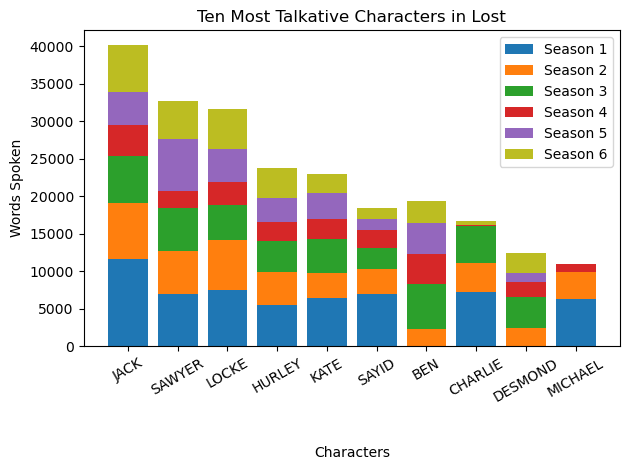

In [29]:
# create data

x = list(top_ten['Character'])

y1 = np.array([s1_cumul[s1_cumul['Character']==name]['Word Count'].values[0] for name in list(top_ten['Character'])])
y2 = np.array([s2_cumul[s2_cumul['Character']==name]['Word Count'].values[0] for name in list(top_ten['Character'])])
y3 = np.array([s3_cumul[s3_cumul['Character']==name]['Word Count'].values[0] for name in list(top_ten['Character'])])
y4 = np.array([s4_cumul[s4_cumul['Character']==name]['Word Count'].values[0] for name in list(top_ten['Character'])])
y5 = np.array([s5_cumul[s5_cumul['Character']==name]['Word Count'].values[0] for name in list(top_ten['Character'])])
y6 = np.array([s6_cumul[s6_cumul['Character']==name]['Word Count'].values[0] for name in list(top_ten['Character'])])

# plot bars in stack manner
plt.bar(x, y1, align='center', color='tab:blue')
plt.bar(x, y2, align='center',bottom=y1, color='tab:orange')
plt.bar(x, y3, align='center',bottom=y1+y2, color='tab:green')
plt.bar(x, y4, align='center',bottom=y1+y2+y3, color='tab:red')
plt.bar(x, y5, align='center',bottom=y1+y2+y3+y4, color='tab:purple')
plt.bar(x, y6, align='center',bottom=y1+y2+y3+y4+y5, color='tab:olive')

plt.xlabel("Characters",labelpad=30)
plt.ylabel("Words Spoken")
plt.legend(["Season 1", "Season 2", "Season 3", "Season 4", 'Season 5', 'Season 6'])
plt.title("Ten Most Talkative Characters in Lost")
plt.tick_params(axis='x', which='major')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('top-ten-talkers.png')
plt.show()

# References 

* https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/